## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  98.699924   245.771156  0.661835  1.962503  190.282092
1  44.943915   249.032449  0.392438  5.434421  107.635760
2  39.258298  1077.787739  0.213751  6.266055  233.795171
3  39.896768  1305.017637  0.540823  6.625072  706.826504
4  39.952337  1410.886053  0.426605  2.122563  603.118223


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9454278	total: 58.1ms	remaining: 58s
1:	learn: 0.9345715	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9258891	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9162986	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9064152	total: 60.3ms	remaining: 12s
5:	learn: 0.8965572	total: 61ms	remaining: 10.1s
6:	learn: 0.8853356	total: 61.7ms	remaining: 8.74s
7:	learn: 0.8746213	total: 62.4ms	remaining: 7.73s
8:	learn: 0.8632607	total: 62.9ms	remaining: 6.93s
9:	learn: 0.8511267	total: 63.4ms	remaining: 6.28s
10:	learn: 0.8405817	total: 64.3ms	remaining: 5.78s
11:	learn: 0.8279334	total: 64.8ms	remaining: 5.34s
12:	learn: 0.8174829	total: 65.2ms	remaining: 4.95s
13:	learn: 0.8060312	total: 65.6ms	remaining: 4.62s
14:	learn: 0.7958358	total: 66.1ms	remaining: 4.34s
15:	learn: 0.7876730	total: 66.6ms	remaining: 4.09s
16:	learn: 0.7773509	total: 67ms	remaining: 3.87s
17:	learn: 0.7680788	total: 67.3ms	remaining: 3.67s
18:	learn: 0.7607536	total: 67.7ms	remaining: 3.5s
1

85:	learn: 0.3422716	total: 101ms	remaining: 1.07s
86:	learn: 0.3378966	total: 102ms	remaining: 1.06s
87:	learn: 0.3340445	total: 102ms	remaining: 1.06s
88:	learn: 0.3304214	total: 102ms	remaining: 1.05s
89:	learn: 0.3268011	total: 103ms	remaining: 1.04s
90:	learn: 0.3232753	total: 103ms	remaining: 1.03s
91:	learn: 0.3190233	total: 104ms	remaining: 1.02s
92:	learn: 0.3153065	total: 104ms	remaining: 1.01s
93:	learn: 0.3123231	total: 105ms	remaining: 1.01s
94:	learn: 0.3084584	total: 105ms	remaining: 1s
95:	learn: 0.3056324	total: 106ms	remaining: 996ms
96:	learn: 0.3024179	total: 106ms	remaining: 989ms
97:	learn: 0.2990592	total: 107ms	remaining: 986ms
98:	learn: 0.2955429	total: 108ms	remaining: 980ms
99:	learn: 0.2924007	total: 108ms	remaining: 974ms
100:	learn: 0.2894445	total: 109ms	remaining: 968ms
101:	learn: 0.2872596	total: 109ms	remaining: 962ms
102:	learn: 0.2836849	total: 110ms	remaining: 956ms
103:	learn: 0.2800368	total: 110ms	remaining: 949ms
104:	learn: 0.2770807	total: 1

256:	learn: 0.0752610	total: 186ms	remaining: 538ms
257:	learn: 0.0747257	total: 187ms	remaining: 537ms
258:	learn: 0.0742178	total: 187ms	remaining: 535ms
259:	learn: 0.0737417	total: 188ms	remaining: 534ms
260:	learn: 0.0733369	total: 188ms	remaining: 533ms
261:	learn: 0.0728193	total: 188ms	remaining: 531ms
262:	learn: 0.0723929	total: 189ms	remaining: 529ms
263:	learn: 0.0719541	total: 189ms	remaining: 528ms
264:	learn: 0.0715000	total: 190ms	remaining: 527ms
265:	learn: 0.0710230	total: 190ms	remaining: 525ms
266:	learn: 0.0706021	total: 191ms	remaining: 524ms
267:	learn: 0.0701476	total: 191ms	remaining: 523ms
268:	learn: 0.0696418	total: 192ms	remaining: 521ms
269:	learn: 0.0692380	total: 192ms	remaining: 520ms
270:	learn: 0.0687844	total: 193ms	remaining: 519ms
271:	learn: 0.0683442	total: 193ms	remaining: 517ms
272:	learn: 0.0679574	total: 194ms	remaining: 516ms
273:	learn: 0.0675697	total: 194ms	remaining: 515ms
274:	learn: 0.0671989	total: 195ms	remaining: 513ms
275:	learn: 

444:	learn: 0.0274149	total: 284ms	remaining: 354ms
445:	learn: 0.0272894	total: 285ms	remaining: 354ms
446:	learn: 0.0271079	total: 286ms	remaining: 354ms
447:	learn: 0.0269856	total: 286ms	remaining: 353ms
448:	learn: 0.0268082	total: 287ms	remaining: 352ms
449:	learn: 0.0266337	total: 287ms	remaining: 351ms
450:	learn: 0.0265155	total: 288ms	remaining: 351ms
451:	learn: 0.0263449	total: 289ms	remaining: 350ms
452:	learn: 0.0262502	total: 290ms	remaining: 350ms
453:	learn: 0.0261372	total: 290ms	remaining: 349ms
454:	learn: 0.0259709	total: 291ms	remaining: 348ms
455:	learn: 0.0258243	total: 291ms	remaining: 348ms
456:	learn: 0.0256623	total: 292ms	remaining: 347ms
457:	learn: 0.0255539	total: 292ms	remaining: 346ms
458:	learn: 0.0254258	total: 293ms	remaining: 345ms
459:	learn: 0.0253204	total: 293ms	remaining: 344ms
460:	learn: 0.0252152	total: 294ms	remaining: 343ms
461:	learn: 0.0251268	total: 294ms	remaining: 342ms
462:	learn: 0.0249941	total: 295ms	remaining: 342ms
463:	learn: 

609:	learn: 0.0151136	total: 368ms	remaining: 236ms
610:	learn: 0.0150382	total: 369ms	remaining: 235ms
611:	learn: 0.0150239	total: 369ms	remaining: 234ms
612:	learn: 0.0150098	total: 370ms	remaining: 234ms
613:	learn: 0.0149959	total: 371ms	remaining: 233ms
614:	learn: 0.0149168	total: 371ms	remaining: 232ms
615:	learn: 0.0148399	total: 371ms	remaining: 232ms
616:	learn: 0.0147646	total: 372ms	remaining: 231ms
617:	learn: 0.0146915	total: 372ms	remaining: 230ms
618:	learn: 0.0146730	total: 373ms	remaining: 229ms
619:	learn: 0.0146598	total: 373ms	remaining: 229ms
620:	learn: 0.0146343	total: 374ms	remaining: 228ms
621:	learn: 0.0146166	total: 374ms	remaining: 227ms
622:	learn: 0.0145730	total: 374ms	remaining: 226ms
623:	learn: 0.0144747	total: 374ms	remaining: 226ms
624:	learn: 0.0144035	total: 375ms	remaining: 225ms
625:	learn: 0.0143630	total: 375ms	remaining: 224ms
626:	learn: 0.0142930	total: 376ms	remaining: 224ms
627:	learn: 0.0142759	total: 376ms	remaining: 223ms
628:	learn: 

814:	learn: 0.0081071	total: 466ms	remaining: 106ms
815:	learn: 0.0080873	total: 467ms	remaining: 105ms
816:	learn: 0.0080533	total: 467ms	remaining: 105ms
817:	learn: 0.0080405	total: 468ms	remaining: 104ms
818:	learn: 0.0080211	total: 468ms	remaining: 103ms
819:	learn: 0.0080086	total: 468ms	remaining: 103ms
820:	learn: 0.0079835	total: 469ms	remaining: 102ms
821:	learn: 0.0079712	total: 469ms	remaining: 102ms
822:	learn: 0.0079517	total: 470ms	remaining: 101ms
823:	learn: 0.0079396	total: 470ms	remaining: 100ms
824:	learn: 0.0079208	total: 471ms	remaining: 99.8ms
825:	learn: 0.0078879	total: 471ms	remaining: 99.3ms
826:	learn: 0.0078710	total: 472ms	remaining: 98.7ms
827:	learn: 0.0078607	total: 472ms	remaining: 98.1ms
828:	learn: 0.0078300	total: 473ms	remaining: 97.5ms
829:	learn: 0.0078200	total: 473ms	remaining: 96.9ms
830:	learn: 0.0078102	total: 474ms	remaining: 96.4ms
831:	learn: 0.0077957	total: 474ms	remaining: 95.8ms
832:	learn: 0.0077829	total: 475ms	remaining: 95.2ms
833

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

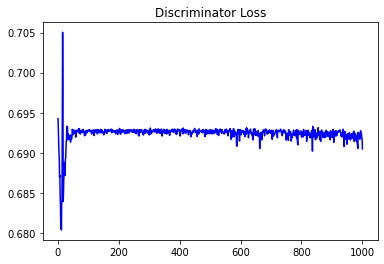

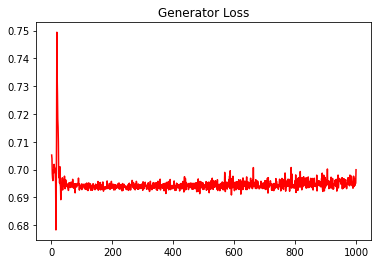

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.006749923564470095


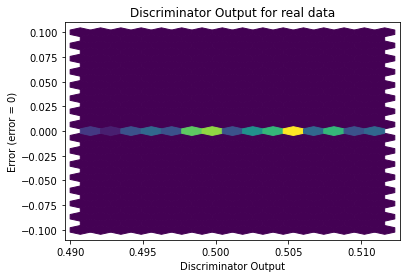

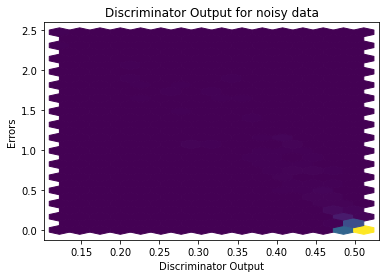

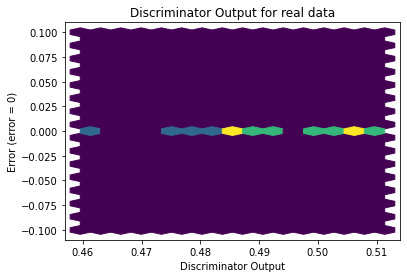

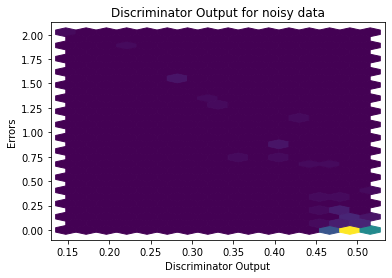

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


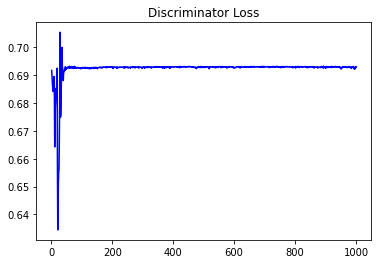

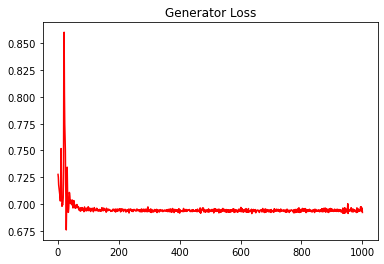

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0055136768915445625


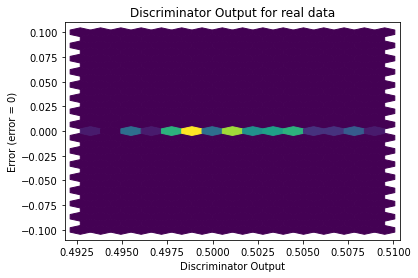

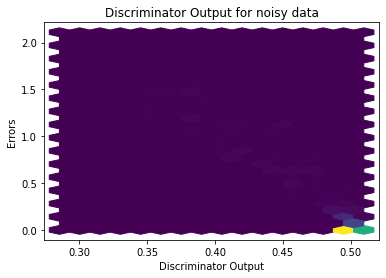

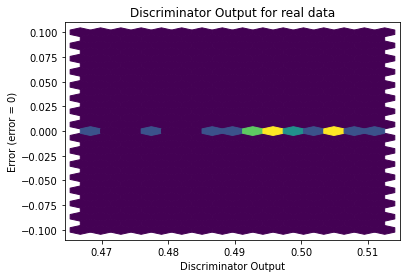

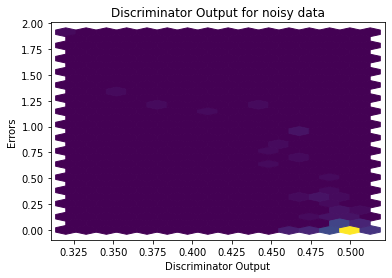

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8969]], requires_grad=True)
